<a href="https://colab.research.google.com/github/priyaregit/Rossmann-Sales-Prediction_Regression_Capstone-Project/blob/main/Rossmann_Sales_Prediction_Capstone_Project_2_Supriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

# Importing datetime module 
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading both the data sets from Google drive and storing it as dataframes: store and store2
store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/Rossmann Stores Data.csv')
store2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/store.csv')

# Setting the option to display upto 50 columns of the dataframe
pd.set_option ("display.max_columns", 50)

Let us perform some basic checks on the data set such as:
*   Checking the shape (i.e. number of rows and columns) of the dataframes 
*   Checking for the various variables/features of each dataframe
*   Checking the data type of each of the features
*   Checking for the missing/null values

These checks would give us a baseline understanding of the available data.

In [ ]:
# Checking the shape of store and store2
store.shape , store2.shape

((1017209, 9), (1115, 10))

In [ ]:
# Checking the head (first 5 rows) of store
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Checking the tail of store
store.tail(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


We have data from 2013-01-01 to 2015-07-31

In [ ]:
# Checking for statistics of the numeric columns in store
store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


We can see that the maximum number of sales is 41551 and maximum number of customers is 7388

In [ ]:
# Checking the head of store2
store2.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
# Checking the tail of store2
store2.tail(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


We can merge both the data sets since they have common feature of 'Store'

In [6]:
# Merging dataframe store2 with the dataframe store, based on the column 'Store' and through an outer join 

store = store.merge(store2, on ='Store', how = 'outer')

In [ ]:
# Checking for the shape of the new dataframe formed after merger
store.shape

(1017209, 18)

In the mergede dataframe , there are now 1,017,209 observations with 18 features.

In [ ]:
# Having a look at the first 5 rows/observations from the new dataframe
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Checking the last 5 rows
store.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Checking for information such as missing values and data type of all the columns
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

<b> Filling the missing/null values

There are 6 columns with missing\null values. 

I will fill the null values in the columns: 'CompetitionDistance', 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with their respective median values because generally, stores do have a competitor store in their vicinity.


In [7]:
# Filling the null values in 'CompetitionDistance', 'CompetitionOpenSinceMonth and 'CompetitionOpenSinceYear' with the respective median value
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace = True)
store.CompetitionOpenSinceMonth.fillna(store.CompetitionOpenSinceMonth.median(), inplace = True)
store.CompetitionOpenSinceYear.fillna(store.CompetitionOpenSinceYear.median(), inplace = True)

In [ ]:
# Checking for value count of 'Promo2'
store['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

The count of observations from stores participating in Promo2 is the same as the number of non-null observations in the columns- 'Promo2SinceWeek',	'Promo2SinceYear' and	'PromoInterval'. This implies that the rest of the observations in the three columns, belong to those stores which are not running Promo2. Hence, i will fill all such null observations in these columns with 0.

In [8]:
# Filling the null values in 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' with 0
store.Promo2SinceWeek.fillna(0, inplace = True)
store.Promo2SinceYear.fillna(0, inplace = True)
store.PromoInterval.fillna('0', inplace = True)

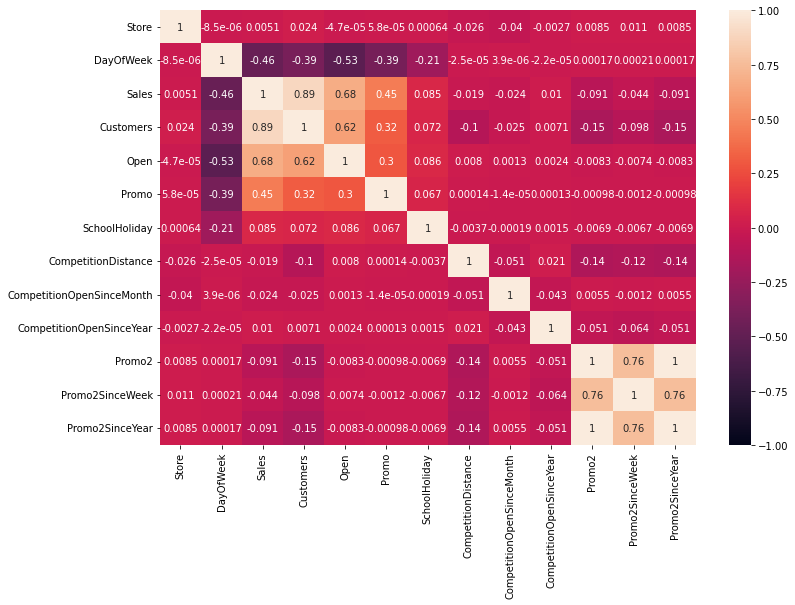

In [ ]:
# Setting the plot size
f, ax = plt.subplots(figsize=(12,8))

# Creating a heat map of 'store' to find correlation 
sns.heatmap(store.corr(), vmin=-1, annot = True)


From the above heat map, we can see that sales has a high correlation with customers and whether the store is open and participating in promotional offer.

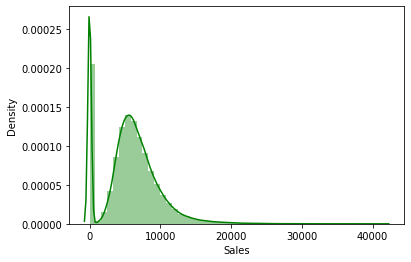

In [ ]:
sns.distplot(store['Sales'], color = 'g')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

The above plot is highly skewed, implying there may be outliers.

In [ ]:
# Checking for the mean, median and maximum value of 'Sales'
store['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [ ]:
store['Sales'].quantile(0.99)

17160.0

In [ ]:
store [store['Sales']> 25000].shape

(758, 18)

We see that the maximum value of Sales is 41,551 while the average sales is 5,773. To prevent overfitting of the model, it would be better to remove the extreme outliers. Here, i would remove all those observations with sales value greater than 30,000.

In [9]:
# Keeping only those observations with Sales < 25000

store = store [ store['Sales'] < 25000 ]

In [ ]:
store.shape

(1016450, 18)

In [ ]:
store [ (store['Open'] == 1) & (store['Sales'] == 0)].shape

(54, 18)

I will also remove all those observations where the store is open but sales is 0 as it could be a case of wrong entry of data 

In [10]:
store.drop(store [(store['Open'] == 1) & (store['Sales'] == 0)].index, inplace = True)


In [ ]:
store.shape

(1016396, 18)

In [ ]:
# Checking the data type of all the columns
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016396 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1016396 non-null  int64  
 1   DayOfWeek                  1016396 non-null  int64  
 2   Date                       1016396 non-null  object 
 3   Sales                      1016396 non-null  int64  
 4   Customers                  1016396 non-null  int64  
 5   Open                       1016396 non-null  int64  
 6   Promo                      1016396 non-null  int64  
 7   StateHoliday               1016396 non-null  object 
 8   SchoolHoliday              1016396 non-null  int64  
 9   StoreType                  1016396 non-null  object 
 10  Assortment                 1016396 non-null  object 
 11  CompetitionDistance        1016396 non-null  float64
 12  CompetitionOpenSinceMonth  1016396 non-null  float64
 13  CompetitionO

Having handled the null values, we now have to convert the data type of a few features in order to build a sales prediction model.

I will first convert the 'Date' column from 'object' data type to date-time format

In [11]:
# Converting data type of the column 'Date' from object to datetime
store['Date'] =  pd.to_datetime(store['Date'], format="%Y-%m-%d")

# Creating four new columns to show the date in the form of year, month, day and week number separately
store['year'] = store['Date'].dt.year
store['month'] = store['Date'].dt.month
store['day'] = store['Date'].dt.day
store['week_number'] = store['Date'].dt.week

In [ ]:
# Performing groupby on month to find the average sales per month
avgsales = store.groupby(['month'], as_index = False).agg({'Sales':'mean'})
avgsales

,month,Sales
0,1,5461.241685
1,2,5637.314812
2,3,5769.514250
3,4,5722.102436
4,5,5472.018965
5,6,5740.315256
6,7,6055.229356
7,8,5686.349667
8,9,5563.980674
9,10,5529.499732


Text(0.5, 1.0, 'Sales per Month')

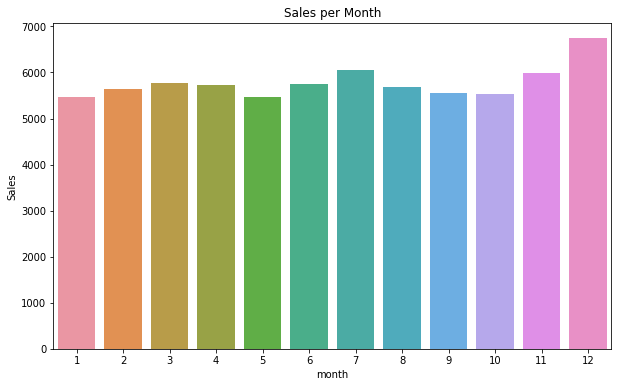

In [ ]:
# Barplot to show sales per month 
sns.barplot(x = "month" , y = "Sales" , data = avgsales)
plt.title('Sales per Month')

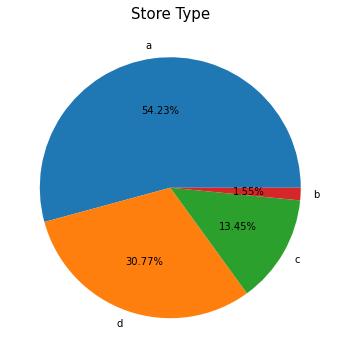

In [ ]:
# Plotting a Pie Chart to visualize the number of stores by type
plt.pie(store['StoreType'].value_counts(), labels = store['StoreType'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Store Type", fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Text(0.5, 1.0, 'Sales based on Store type')

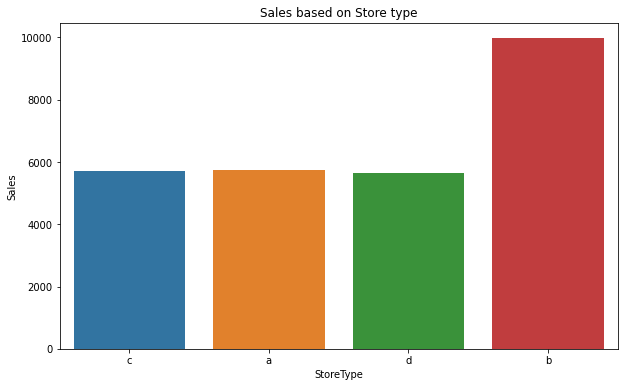

In [ ]:
# Barplot to check Sales according to Store type
sns.barplot(x ='StoreType', y ='Sales', data = store, ci = None)
plt.title('Sales based on Store type')

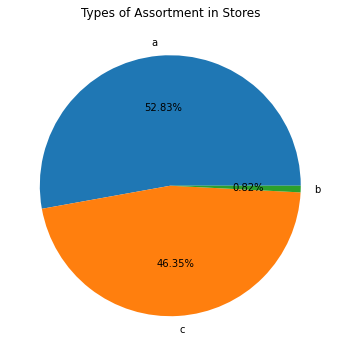

In [ ]:
# Plotting a Pie Chart to visualize the number of stores by assortment
plt.pie(store['Assortment'].value_counts(), labels = store['Assortment'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Types of Assortment in Stores", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Text(0.5, 1.0, 'Assortment vs Sales')

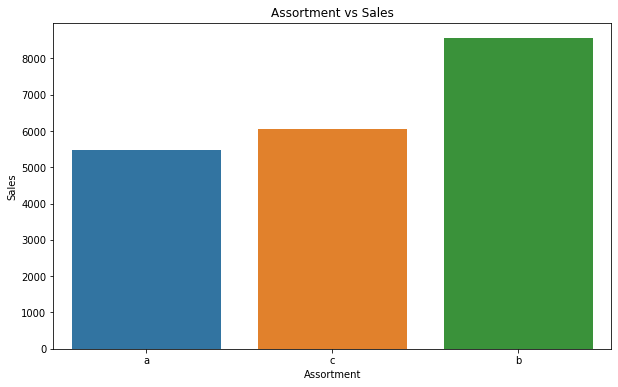

In [ ]:
# Barplot to check Sales according to Assortments
sns.barplot(x ='Assortment', y ='Sales', data = store, ci = None)
plt.title('Assortment vs Sales')

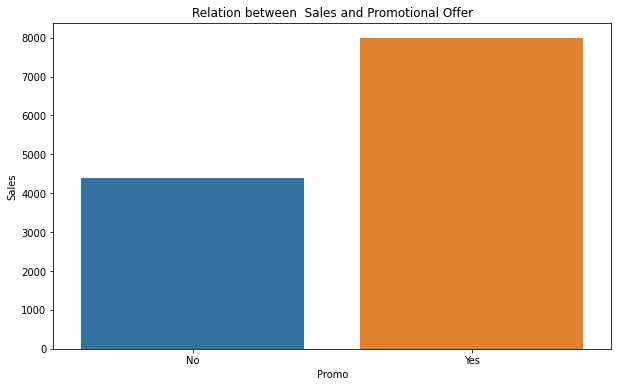

In [ ]:
# Barplot to check for the effect of Promo on Sales
sns.barplot(data = store, x = 'Promo', y = 'Sales', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promotional Offer")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


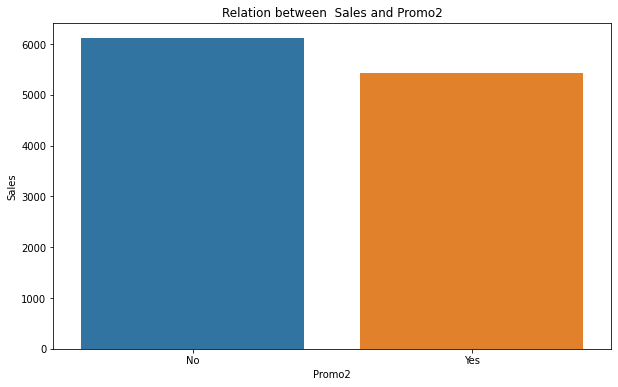

In [ ]:
# Barplot to check for the effect of Promo2 on Sales
sns.barplot(data = store, x = 'Promo2', y = 'Sales', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promo2")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


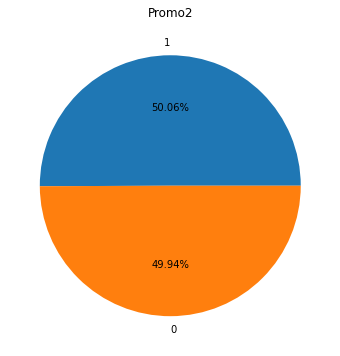

In [ ]:
# Plotting a Pie Chart to visualize the number of stores that are running Promo2
plt.pie(store['Promo2'].value_counts(), labels = store['Promo2'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Promo2")

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Looks like Promo2 does not have much of an effect on sales

Let us check the sales based on the store type, presence of promotional offer and month.

In [ ]:
temp_df1 = store.groupby(['month','StoreType','Promo'])['Sales'].mean().reset_index()
temp_df1

,month,StoreType,Promo,Sales
0,1,a,0,4068.465082
1,1,a,1,7711.565413
2,1,b,0,8281.111562
3,1,b,1,10370.114286
4,1,c,0,4227.936393
...,...,...,...,...
91,12,b,1,13593.297872
92,12,c,0,5341.134245
93,12,c,1,10662.879035
94,12,d,0,4971.875407


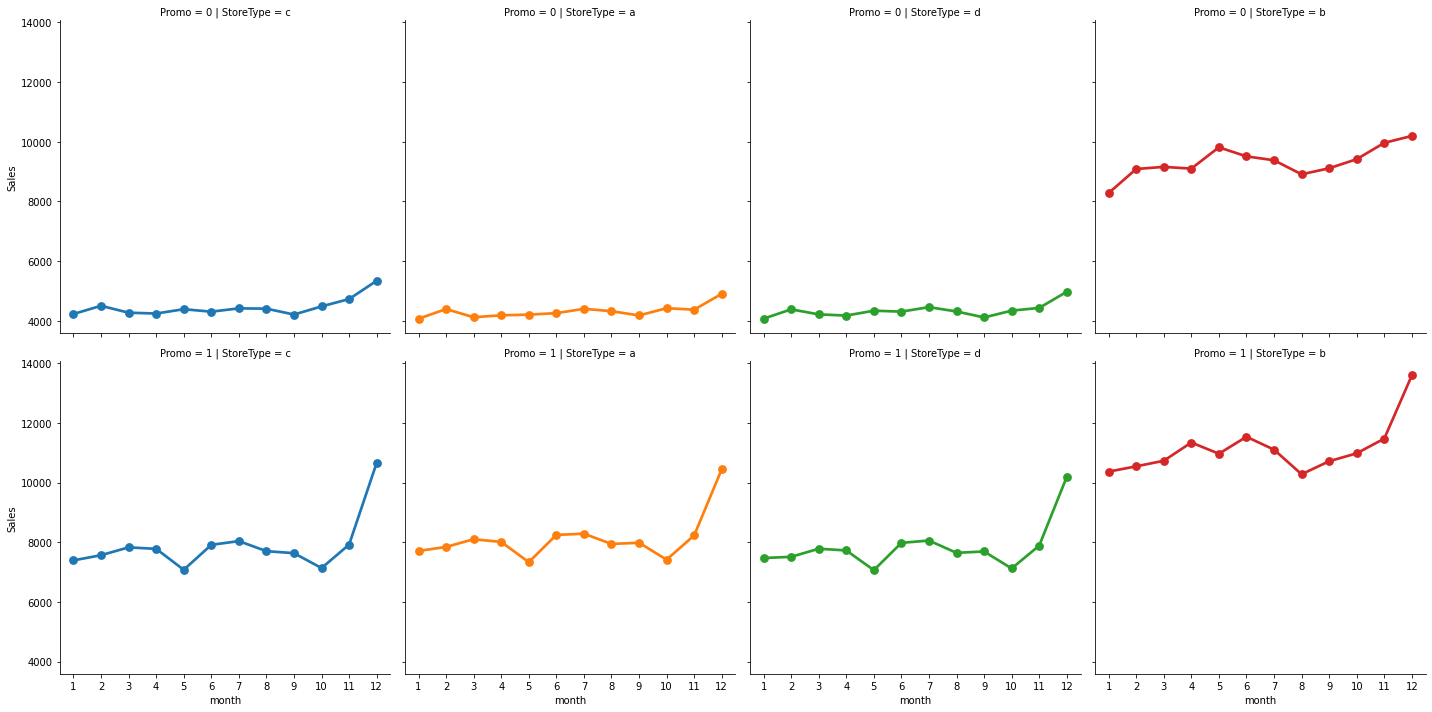

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo', col ='StoreType', hue ='StoreType', ci = None)


The presence of the promo positively affects the sales in the stores.

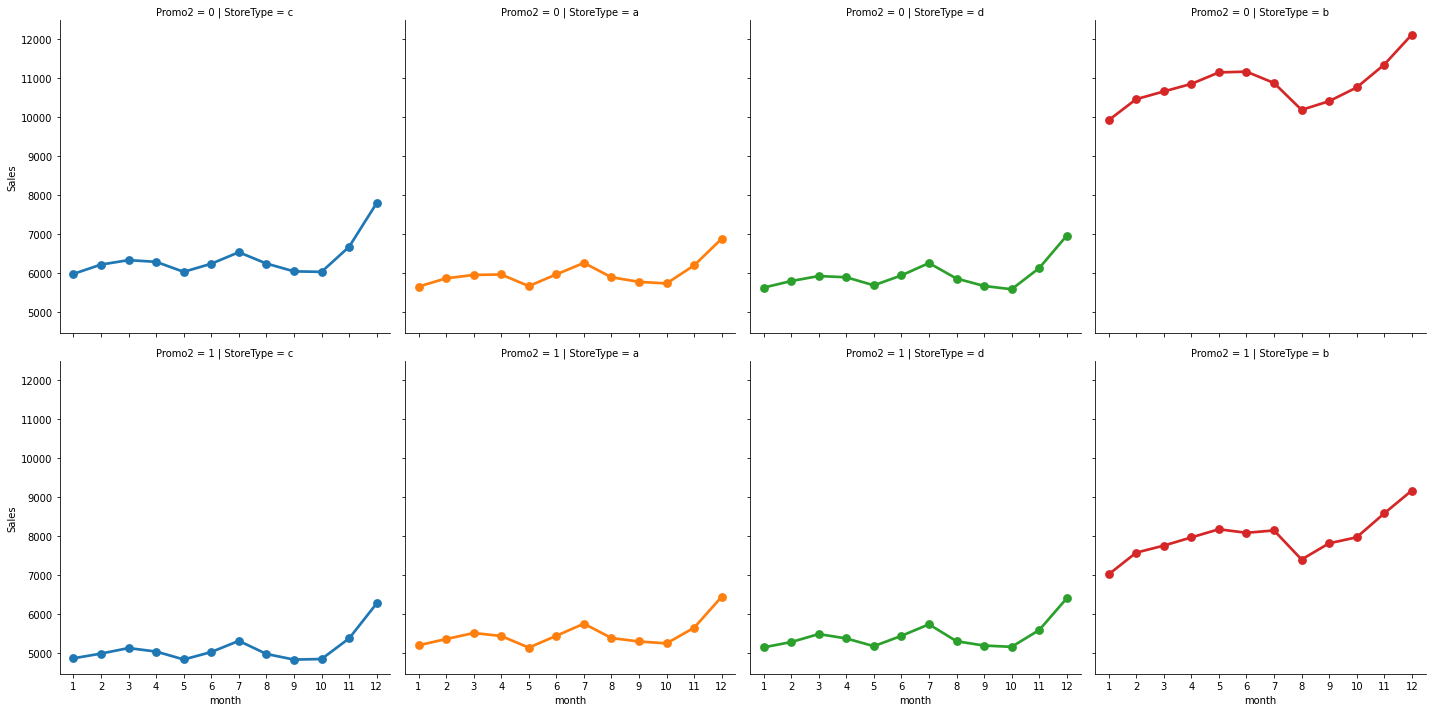

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo2', col ='StoreType', hue ='StoreType', ci = None)

Promo2 doesnot have a very positive relationship with sales.

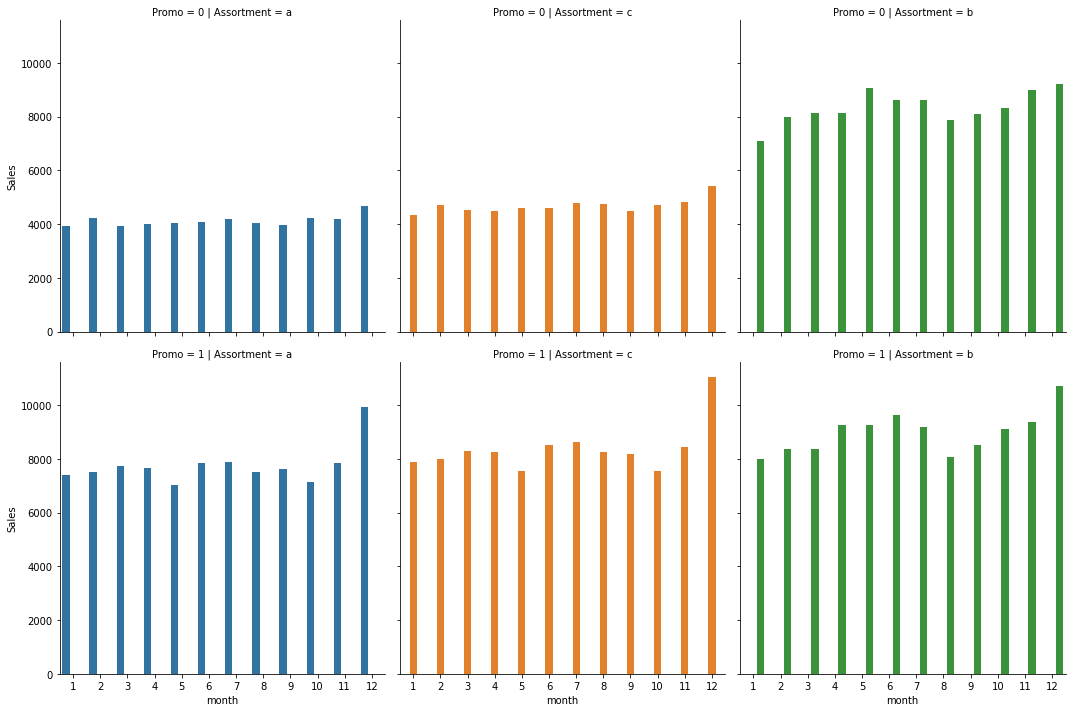

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo', col ='Assortment', hue ='Assortment', kind = 'bar', ci = None)

The presence of promotional offer seems to have a lot of impact on sales if we differentiate according to assortment

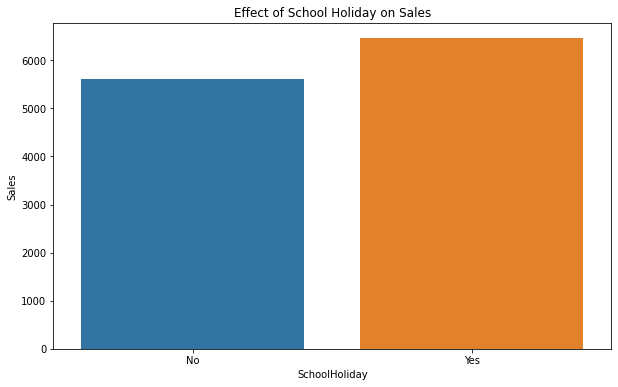

In [ ]:
# Bar plot to check if there is any effect of school holidays on sales
sns.barplot(x ='SchoolHoliday', y ='Sales', data = store, ci = None)
plt.title('Effect of School Holiday on Sales')
plt.xticks([0,1],labels = ['No','Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

There is a small increase in average sales when there is a School holiday.

In [ ]:
# Checking for unique values in StateHoliday
store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [12]:
# Mapping the value of '0' to state holidays 0. This is done to remove differentiation between 0 and '0'

store['StateHoliday'] = ['0' if i == 0 else i for i in store['StateHoliday']]


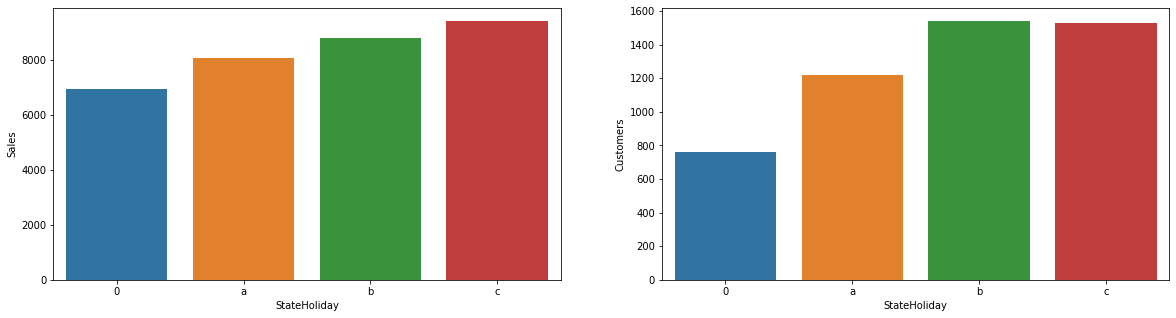

In [ ]:
# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='StateHoliday', y ='Sales', data = store[store['Open'] != 0], ax = ax1, ci = None)
sns.barplot(x ='StateHoliday', y ='Customers', data = store[store['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()


If the store is open, then there are higher number on sales on Christmas and Easter.
There is a two fold increase in the number of customers on christmas and easter when compared to a normal day.

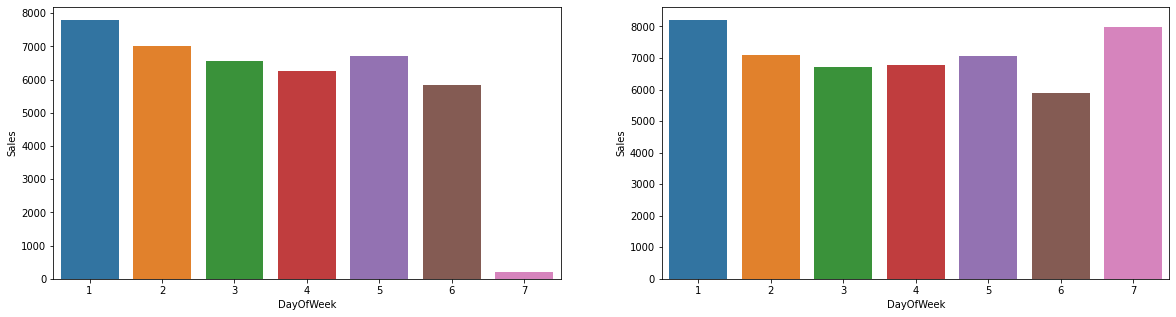

In [ ]:
# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='DayOfWeek', y ='Sales', data = store, ax = ax1, ci =None)
sns.barplot(x ='DayOfWeek', y ='Sales', data = store[ store['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

Next, I create a new column 'CompetitionOpen' to calculate the number of months since the nearest competitor store has opened

In [13]:
# Creating a column  'CompetitionOpen' and assigning the value of 0 to all the observations
store['CompetitionOpen'] = 0

# For all the non-zero observations of 'CompetitionOpenSinceYear', 'CompetitionOpen' takes the value of the total period for which the competitor existed
store['CompetitionOpen'] = store['CompetitionOpen'].where(store['CompetitionOpenSinceYear'] == 0, 
                                                          other =(12 * (store['year'] - store['CompetitionOpenSinceYear']) + 
                                                                  (store['month'] - store['CompetitionOpenSinceMonth'])))

# All the negative values of CompetitionOpen are set to 0
store['CompetitionOpen'] = store['CompetitionOpen'].where(store['CompetitionOpen'] > 0, other = 0)


Similarly, I create a new column 'Promo2open' to calculate the number of 
months since the time the store has begun participating in Promo2.

In [14]:
# Creating a column  'Promo2open' and assigning the value of 0 to all the observations
store['Promo2open'] = 0

# For all the non-zero observations of 'Promo2SinceYear', 'Promo2open' takes the value of the total period for which the store has been running Promo2
store['Promo2open'] = store['Promo2open'].where(store['Promo2SinceYear'] == 0, 
                                                other = (12 * (store['year'] - store['Promo2SinceYear']) + 
                                                         (store['week_number'] - store['Promo2SinceWeek'])/4))

# All the negative values of Promo2open are set to 0
store['Promo2open'] = store['Promo2open'].where(store['Promo2open'] > 0, other = 0)


In [ ]:
store['PromoInterval'].unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [15]:
store.shape

(1016396, 24)

In [16]:
store.tail(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week_number,CompetitionOpen,Promo2open
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,1,29,6.75
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1,29,6.75


In [17]:
store.drop(columns = ['Date','Customers','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek',
                   'Promo2SinceYear','year','week_number'], inplace = True)	

In [18]:
store.shape

(1016396, 16)

In [ ]:
store.head(2)

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,day,CompetitionOpen,Promo2open,IsPromo2Month
0,1,5,5263,1,1,0,1,c,a,1270.0,0,7,31,82,0.0,0
1,1,4,5020,1,1,0,1,c,a,1270.0,0,7,30,82,0.0,0


In [20]:
df = store.copy()

Next, We need to encode 'StateHoliday', 'StoreType', 'Assortment' and 'PromoInterval' as they are of object data type.

In [22]:
label_encoder = LabelEncoder()

def encoding(col):
  store[col] = label_encoder.fit_transform(store[col])


In [24]:
encoding('StoreType')
encoding('Assortment')
encoding('PromoInterval')
encoding('StateHoliday')


In [27]:
store['Promo2'].value_counts()

1    509036
0    507360
Name: Promo2, dtype: int64

In [29]:
store[store['PromoInterval'] == 0].shape

(507360, 16)

Promointerval contains the information provided by Promo2. So, Promo2 can be dropped.

In [25]:
store.shape

(1016396, 16)

In [26]:
store.head(2)

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,month,day,CompetitionOpen,Promo2open
0,1,5,5263,1,1,0,1,2,0,1270.0,0,0,7,31,82,0.0
1,1,4,5020,1,1,0,1,2,0,1270.0,0,0,7,30,82,0.0


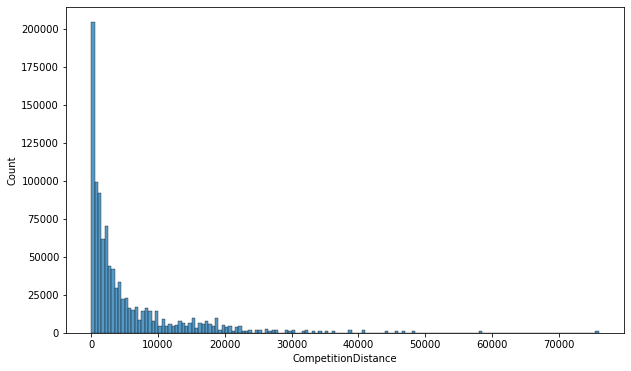

In [ ]:

sns.histplot(data = store, x = 'CompetitionDistance', binwidth = 500)

In [ ]:
store['CompetitionDistance'].describe()

count    1.017002e+06
mean     5.422779e+03
std      7.707290e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [30]:
store['ln_CompetitionDistance'] = store['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)

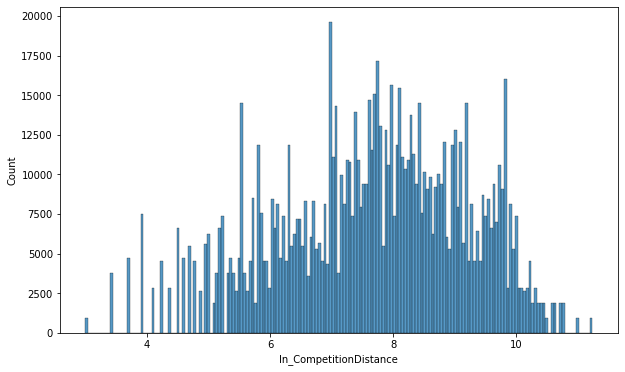

In [ ]:
sns.histplot(data = store, x = 'ln_CompetitionDistance')

In [31]:
store['ln_Sales'] = store['Sales'].map(lambda x : np.log(x) if x != 0 else 0)


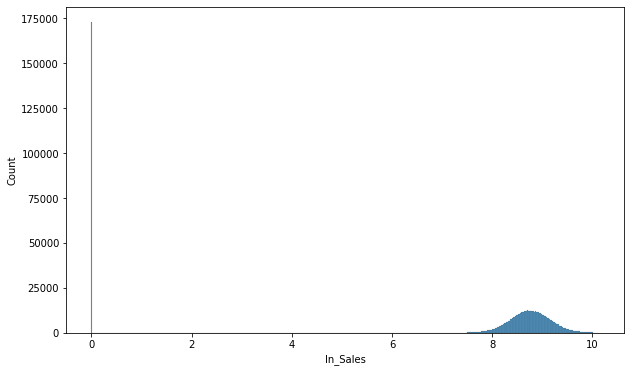

In [ ]:

sns.histplot(data = store, x = 'ln_Sales')

In [ ]:
store['ln_Sales'].describe()

count    1.017002e+06
mean     7.269166e+00
std      3.311653e+00
min      0.000000e+00
25%      8.223359e+00
50%      8.655911e+00
75%      8.968906e+00
max      1.030879e+01
Name: ln_Sales, dtype: float64

In [ ]:
store['ln_CompetitionDistance'].describe()

count    1.017002e+06
mean     7.642685e+00
std      1.559148e+00
min      2.995732e+00
25%      6.565265e+00
50%      7.753624e+00
75%      8.836374e+00
max      1.123664e+01
Name: ln_CompetitionDistance, dtype: float64

In [ ]:
store.tail(2)

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,day,CompetitionOpen,Promo2open,IsPromo2Month,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,ln_CompetitionDistance,ln_Sales
1017207,1115,3,3697,1,0,0,1,5350.0,1,1,2,29,6.75,0,0,0,0,1,0,0,1,8.584852,8.215277
1017208,1115,2,0,0,0,1,1,5350.0,1,1,1,29,6.75,0,0,0,0,1,0,0,1,8.584852,0.000000


In [ ]:
store['Promo2open'].describe()

count    1.017002e+06
mean     1.311299e+01
std      1.900834e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+01
max      7.200000e+01
Name: Promo2open, dtype: float64

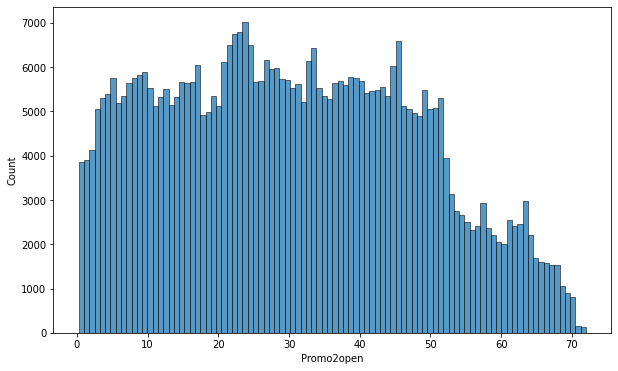

In [ ]:
sns.histplot(data = store[ store['Promo2open'] > 0], x = 'Promo2open')

In [32]:
store['ln_Promo2open'] = store['Promo2open'].map(lambda x : np.log(x) if x != 0 else 0)

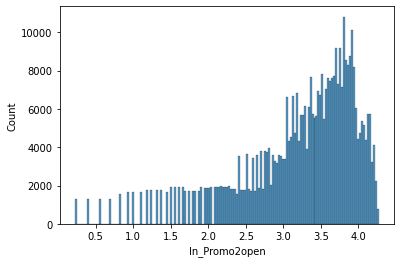

In [ ]:
sns.histplot( data = store[ store['ln_Promo2open'] > 0], x = 'ln_Promo2open')

In [33]:
store['sqrt_Promo2open'] = store['Promo2open'].map(lambda x : np.sqrt(x) if x != 0 else 0)

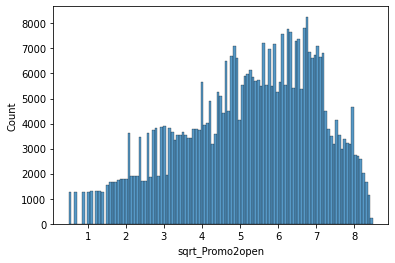

In [ ]:
sns.histplot( data = store[ store['sqrt_Promo2open'] > 0], x = 'sqrt_Promo2open')

Square root transformation works better than log transformation in making the data relatively more normalized.

In [ ]:
store['CompetitionOpen'].describe()

count    1.017002e+06
mean     5.597803e+01
std      5.950710e+01
min      0.000000e+00
25%      2.900000e+01
50%      4.600000e+01
75%      7.300000e+01
max      1.386000e+03
Name: CompetitionOpen, dtype: float64

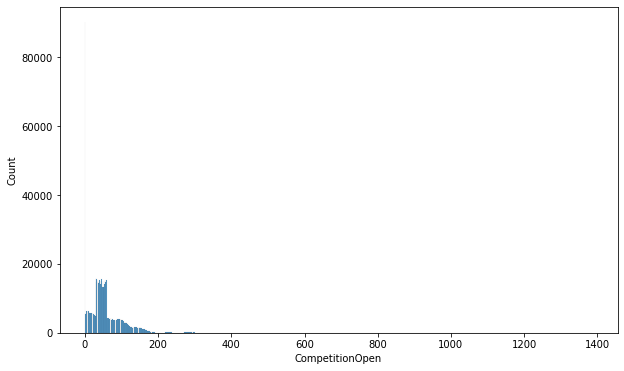

In [ ]:
sns.histplot( data = store, x = 'CompetitionOpen')

In [34]:
store['ln_CompetitionOpen'] = store['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

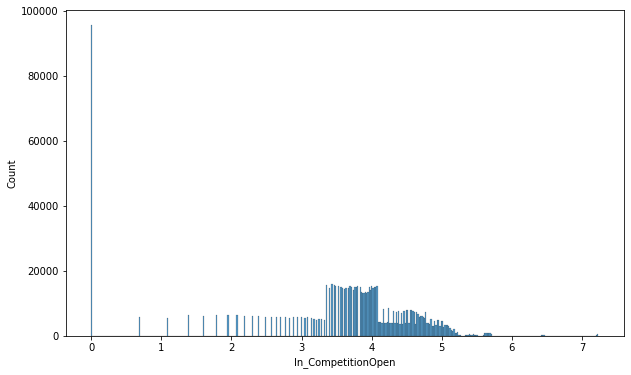

In [ ]:
sns.histplot( data = store, x = 'ln_CompetitionOpen')

In [35]:
store.drop(columns=['Sales','CompetitionDistance','Promo2','Promo2open','CompetitionOpen','ln_Promo2open'], inplace = True)

In [36]:
store.shape

(1016396, 15)

In [37]:
store.tail(2)

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoInterval,month,day,ln_CompetitionDistance,ln_Sales,sqrt_Promo2open,ln_CompetitionOpen
1017207,1115,3,1,0,0,1,3,2,3,1,2,8.584852,8.215277,2.598076,3.367296
1017208,1115,2,0,0,1,1,3,2,3,1,1,8.584852,0.000000,2.598076,3.367296


Sales is possible only if the store is open. So for training the model, i will be considering all those observations in which the store is open.

In [39]:
store = store[ store['Open'] == 1]


In [40]:
store.drop(['Open'], axis = 1, inplace = True)

In [41]:
store.shape

(843579, 14)

In [42]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843579 entries, 0 to 1017207
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   843579 non-null  int64  
 1   DayOfWeek               843579 non-null  int64  
 2   Promo                   843579 non-null  int64  
 3   StateHoliday            843579 non-null  int64  
 4   SchoolHoliday           843579 non-null  int64  
 5   StoreType               843579 non-null  int64  
 6   Assortment              843579 non-null  int64  
 7   PromoInterval           843579 non-null  int64  
 8   month                   843579 non-null  int64  
 9   day                     843579 non-null  int64  
 10  ln_CompetitionDistance  843579 non-null  float64
 11  ln_Sales                843579 non-null  float64
 12  sqrt_Promo2open         843579 non-null  float64
 13  ln_CompetitionOpen      843579 non-null  float64
dtypes: float64(4), int6

In [43]:
X = store.drop(['ln_Sales'], axis = 1)
y = store['ln_Sales'].values

In [44]:
X.shape, y.shape

((843579, 13), (843579,))

In [45]:
# split the data set into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [46]:
X_train.shape, X_test.shape

((674863, 13), (168716, 13))

In [47]:
# Transforming data through the StandardScaler

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b> Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [ ]:
print(lr.intercept_, end = '\n\n')
print(lr.coef_)

2166008667684.6724

[-1.29007297e-01  3.24128933e-01 -1.34024455e-01  1.53423908e-02
 -1.35786136e-01  8.46243797e-02 -1.59150694e-02 -2.54363355e-02
 -1.43283005e+12 -1.43283005e+12 -1.43283005e+12 -1.43283005e+12
 -7.33178616e+11 -7.33178616e+11 -7.33178616e+11 -2.07399611e-01
  8.53579867e-02 -6.41767418e-02]


In [ ]:
# Defining a function to find the R squared, adjusted R squared, MSE and RMSE of the models

def metrics(train_pred, test_pred, model):

  print(f'The metrics for model prediction using {model} are:', end = '\n\n')
  print('R_squared = ', r2(np.exp(y_test), np.exp(test_pred)), end = '\n\n')
  print('R_squared for training data set = ', r2(np.exp(y_train), np.exp(train_pred)), end = '\n\n')
  print("Adjusted R_squared = ",1-(1-r2(np.exp(y_test), np.exp(test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), end = '\n\n')
  print('MSE = ', mse(np.exp(y_test), np.exp(test_pred)), end = '\n\n')
  print('RMSE = ', math.sqrt(mse(np.exp(y_test), np.exp(test_pred))), end = '\n\n')
  print('RMSE for training data set = ', math.sqrt(mse(np.exp(y_train), np.exp(train_pred))))



In [ ]:
metrics(y_pred_train, y_pred, 'Linear Regression')

The metrics for model prediction using Linear Regression are:

R_squared =  0.19573003644140563

R_squared for training data set =  0.19482731451686353

Adjusted R_squared =  0.19564422069279086

MSE =  7491507.475990496

RMSE =  2737.061832694047

RMSE for training data set =  2724.0207320398813


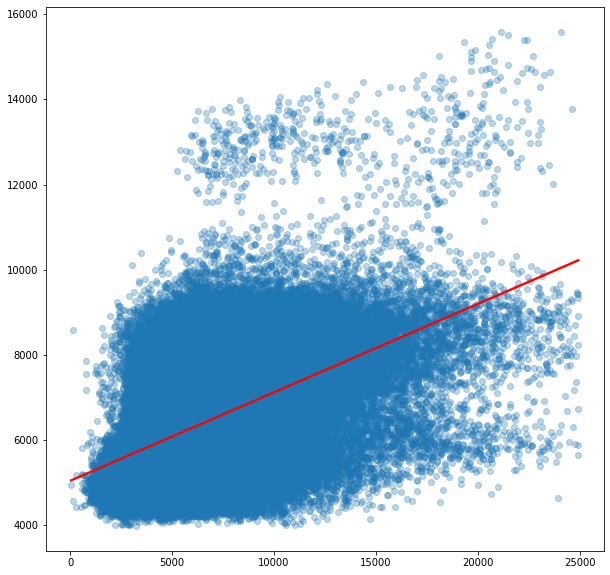

In [ ]:
plt.figure(figsize=(10,10))

# Drawing a regression plot for the test data prediction
sns.regplot(x = np.exp(y_test), y = np.exp(y_pred), line_kws = {"color": "red"}, scatter_kws = {'alpha':0.3})

<b> Lasso Regression

In [ ]:
lasso  = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
# Predicting the y values with the trained lasso model
y_pred_l = lasso.predict(X_test)
y_pred_train_l = lasso.predict(X_train)

In [ ]:
print(lasso.intercept_)
print(lasso.coef_)

8.756004354056756
[-0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0.]


In [ ]:
metrics(y_pred_train_l, y_pred_l, 'Lasso Regression')

The metrics for model prediction using Lasso Regression are:

R_squared =  -0.03849981333784669

R_squared for training data set =  -0.03721798687509059

Adjusted R_squared =  -0.0386106214532258

MSE =  9673280.699196983

RMSE =  3110.1898172293254

RMSE for training data set =  3091.725383171583


In [ ]:
# Cross validation and hyperparameter tuning

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,20,40,50,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 20, 40, 50, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train_lasso = lasso_regressor.predict(X_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, ", the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08} , the negative mean squared error is:  -0.13747231355642334


In [ ]:
metrics(y_pred_train_lasso, y_pred_lasso, 'Lasso Regression with hyperparameter tuning')

The metrics for model prediction using Lasso Regression with hyperparameter tuning are:

R_squared =  0.19575979371662044

R_squared for training data set =  0.19485886925962959

Adjusted R_squared =  0.19567398114311219

MSE =  7491230.296859311

RMSE =  2737.011197795747

RMSE for training data set =  2723.967354287998


<b> Ridge Regression

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)


Ridge(alpha=0.001)

In [ ]:
y_pred_r = ridge.predict(X_test)
y_pred_train_r = ridge.predict(X_train)

In [ ]:
print(ridge.intercept_)
print(ridge.coef_)


8.86235064127843
[-0.12896128  0.32413114 -0.12788767  0.01555843 -0.13581429  0.08479644
 -0.01601066 -0.02521163 -0.13558691  0.37529748 -0.12703818 -0.11267236
  0.03241235 -0.184377    0.15196477 -0.20730006  0.08563562 -0.0639681 ]


In [ ]:
metrics(y_pred_train_r, y_pred_r, 'Ridge Regression')

The metrics for model prediction using Ridge Regression are:

R_squared =  0.19575984056298545

R_squared for training data set =  0.19485891214960482

Adjusted R_squared =  0.19567402799447575

MSE =  7491229.860500987

RMSE =  2737.011118081362

RMSE for training data set =  2723.967281734945


In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,10,20,40,50,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   10, 20, 40, 50, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_train_ridge = ridge_regressor.predict(X_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, ", the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.13747231255891984


In [ ]:
metrics(y_pred_train_ridge, y_pred_ridge, 'Ridge Regression with hyperparameter tuning')

The metrics for model prediction using Ridge Regression with hyperparameter tuning are:

R_squared =  0.19575809502862762

R_squared for training data set =  0.19485733580986508

Adjusted R_squared =  0.19567228227386912

MSE =  7491246.119573542

RMSE =  2737.014088303811

RMSE for training data set =  2723.969948283603


<b> Elatic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred_en = elasticnet.predict(X_test)
y_pred_train_en = elasticnet.predict(X_train)

In [ ]:
metrics(y_pred_train_en, y_pred_en, 'Elastic Net Regression')

The metrics for model prediction using Elastic Net Regression are:

R_squared =  0.03996688769302037

R_squared for training data set =  0.04165034216952579

Adjusted R_squared =  0.03986445198864186

MSE =  8942389.451203454

RMSE =  2990.3828268640546

RMSE for training data set =  2971.85686108279


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-5,1e-3,1e-1,1,5,10,20,40,60,100,200],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring ='neg_mean_squared_error', cv = 3)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 1, 5, 10,
                                   20, 40, 60, 100, 200],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred_train_elastic = elastic_regressor.predict(X_train)

In [ ]:
print("The best fit alpha and l1 ratio is found out to be :" , elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, ", the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha and l1 ratio is found out to be : {'alpha': 1e-10, 'l1_ratio': 0.3}

Using  {'alpha': 1e-10, 'l1_ratio': 0.3} , the negative mean squared error is:  -0.13747399302851035


In [ ]:
metrics(y_pred_train_elastic, y_pred_elastic, 'Elastic Net Regression with hyperparameter tuning')

The metrics for model prediction using Elastic Net Regression with hyperparameter tuning are:

R_squared =  0.19575984206365693

R_squared for training data set =  0.1948589135035016

Adjusted R_squared =  0.19567402949530732

MSE =  7491229.84652273

RMSE =  2737.0111155277996

RMSE for training data set =  2723.967279444682


<b> Decision Trees

In [ ]:
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:

y_pred_dt = decision_model.predict(X_test)

y_pred_train_dt = decision_model.predict(X_train)

In [ ]:
metrics(y_pred_train_dt, y_pred_dt, 'Decision Tree')

The metrics for model prediction using Decision Tree are:

R_squared =  0.7915959844567202

R_squared for training data set =  0.997825604799371

Adjusted R_squared =  0.7915737477110769

MSE =  1941214.158441186

RMSE =  1393.274617023215

RMSE for training data set =  141.55823277196208


We can see that the model prediction in case of the training data set is very good, but that of the test data pales in comparison. This is a clear case of overfitting of the model.

So, let us pre-prune the tree.

In [ ]:
d_tree = DecisionTreeRegressor(max_depth = 20)
d_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [ ]:
y_pred_dt = d_tree.predict(X_test)
y_pred_train_dt = d_tree.predict(X_train)

metrics(y_pred_train_dt, y_pred_dt, 'Decision Tree')

The metrics for model prediction using Decision Tree are:

R_squared =  0.7377221108182946

R_squared for training data set =  0.830917072413633

Adjusted R_squared =  0.7376941257207217

MSE =  2443031.3907260625

RMSE =  1563.0199585181447

RMSE for training data set =  1248.2908042672063


In [ ]:
importance_dt = pd.DataFrame({'feature': X.columns, 
                              'importance': decision_model.feature_importances_}
                             ).sort_values('importance', ascending = False)


Text(0.5, 1.0, 'Feature Importance using Decision Tree')

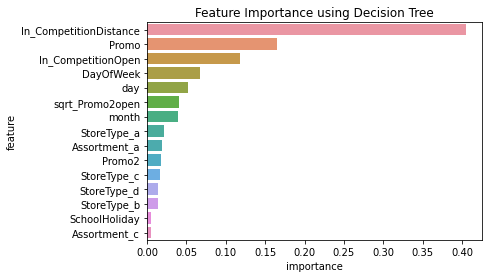

In [ ]:

sns.barplot(data = importance_dt.head(15), x ='importance', y ='feature')

plt.title('Feature Importance using Decision Tree')

<b> Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 20)

rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=20)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [ ]:
metrics(y_pred_train_rf, y_pred_rf, 'Random Forest')

The metrics for model prediction using Random Forest are:

R_squared =  0.8011569459875969

R_squared for training data set =  0.8561639237862297

Adjusted R_squared =  0.801135729398255

MSE =  1852156.9785991062

RMSE =  1360.9397409874937

RMSE for training data set =  1151.3299582912155


In [ ]:
importance_rf = pd.DataFrame({'feature': X.columns, 
                              'importance': rf.feature_importances_}
                             ).sort_values('importance', ascending = False)

Text(0.5, 1.0, 'Feature Importance using Random Forest')

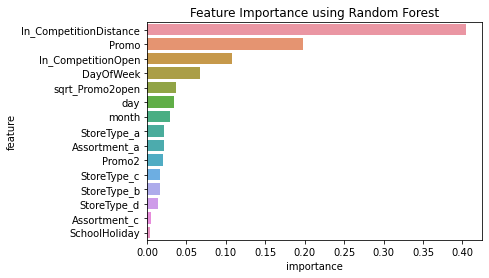

In [ ]:
sns.barplot(data = importance_rf.head(15), x ='importance', y ='feature')

plt.title('Feature Importance using Random Forest')

In [ ]:
# Hyperparameter tuning

rf_tuned = RandomForestRegressor() 
grid_values = {'n_estimators':[150,200], 'max_depth':[20,25], 'n_jobs':[4]} # n_estimators is no of trees you want to build
rf_tuned = GridSearchCV(rf_tuned, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the object to train dataset
rf_tuned.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 25], 'n_estimators': [150, 200],
                         'n_jobs': [4]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit parameters are found out to be :" , rf_tuned.best_params_)
print("\nUsing ",rf_tuned.best_params_, ", the negative mean squared error is: ", rf_tuned.best_score_)

The best fit parameters are found out to be : {'max_depth': 25, 'n_estimators': 200, 'n_jobs': 4}

Using  {'max_depth': 25, 'n_estimators': 200, 'n_jobs': 4} , the negative mean squared error is:  -0.022804360610700108


In [ ]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_train_rf_tuned = rf_tuned.predict(X_train)

In [ ]:
metrics(y_pred_train_rf_tuned, y_pred_rf_tuned, 'Random Forest with hyperparameter tuning')

The metrics for model prediction using Random Forest with hyperparameter tuning are:

R_squared =  0.863476129932628

R_squared for training data set =  0.9441015287131114

Adjusted R_squared =  0.8634615628113324

MSE =  1271674.4869291133

RMSE =  1127.6854556697597

RMSE for training data set =  717.7378630231246


<Figure size 1080x576 with 0 Axes>

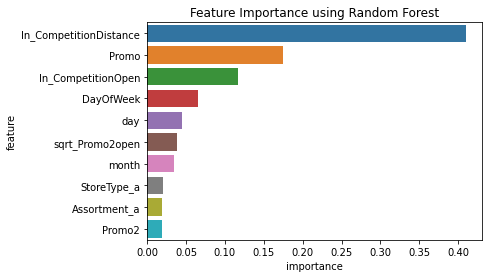

<Figure size 1080x576 with 0 Axes>

In [ ]:
importance_rf_tuned = pd.DataFrame({'feature': X.columns, 
                              'importance': rf_tuned.best_estimator_.feature_importances_}
                             ).sort_values('importance', ascending = False)

sns.barplot(data = importance_rf_tuned.head(10), x ='importance', y ='feature')

plt.title('Feature Importance using Random Forest')  

plt.figure(figsize = (15,8))

In [ ]:
# Hyperparameter tuning

rf_tuned1 = RandomForestRegressor() 
grid_values = {'n_estimators':[130,180], 'max_depth':[15,25]} # n_estimators is no of trees you want to build
rf_tuned1 = GridSearchCV(rf_tuned1, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the object to train dataset
rf_tuned1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 25], 'n_estimators': [130, 180]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_rf_tuned1 = rf_tuned1.predict(X_test)
y_pred_train_rf_tuned1 = rf_tuned1.predict(X_train)

In [ ]:
print("The best fit parameters are found out to be :" , rf_tuned1.best_params_)
print("\nUsing ",rf_tuned1.best_params_, ", the negative mean squared error is: ", rf_tuned1.best_score_)

The best fit parameters are found out to be : {'max_depth': 25, 'n_estimators': 180}

Using  {'max_depth': 25, 'n_estimators': 180} , the negative mean squared error is:  -0.022815104129002953


In [ ]:
metrics(y_pred_train_rf_tuned1, y_pred_rf_tuned1, 'Random Forest with hyperparameter tuning')

The metrics for model prediction using Random Forest with hyperparameter tuning are:

R_squared =  0.8621339659473921

R_squared for training data set =  0.9435481871505164

Adjusted R_squared =  0.8621192556169597

MSE =  1284176.2984911308

RMSE =  1133.21502747322

RMSE for training data set =  721.2815749923647


In [48]:
import gc
gc.collect()

307

<Figure size 1080x576 with 0 Axes>

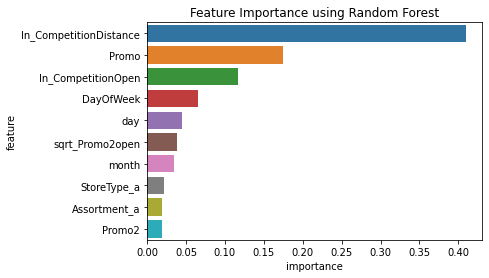

<Figure size 1080x576 with 0 Axes>

In [ ]:

importance_rf_tuned1 = pd.DataFrame({'feature': X.columns, 
                              'importance': rf_tuned1.best_estimator_.feature_importances_}
                             ).sort_values('importance', ascending = False)

sns.barplot(data = importance_rf_tuned1.head(10), x ='importance', y ='feature')

plt.title('Feature Importance using Random Forest')  

plt.figure(figsize = (15,8))

<b> XG Boost

In [ ]:
xgb_model = XGBRegressor(max_depth = 20, n_jobs = 4, n_estimators = 100, random_state = 27)
xgb_model.fit(X_train,y_train)

[20:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=20, n_jobs=4, random_state=27)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

In [ ]:
metrics(y_pred_train_xgb, y_pred_xgb, 'XG Boost')

The metrics for model prediction using XG Boost are:

R_squared =  0.9165697545832882

R_squared for training data set =  0.9753777094068822

Adjusted R_squared =  0.916560852561216

MSE =  777125.0147121572

RMSE =  881.5469441340928

RMSE for training data set =  476.3543309284609


Text(0.5, 1.0, 'Feature Importance using XG Boost')

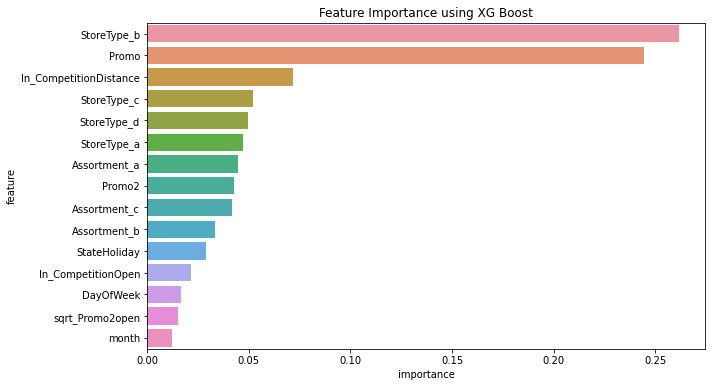

In [ ]:
importance_xgb = pd.DataFrame({'feature': X.columns, 
                              'importance': xgb_model.feature_importances_}
                             ).sort_values('importance', ascending = False)

sns.barplot(data = importance_xgb.head(15), x ='importance', y ='feature')

plt.title('Feature Importance using XG Boost')

In [ ]:
xgb_model1 = XGBRegressor() 
params = {'n_estimators':[300,500], 'max_depth':[25,30], 'learning_rate':[0.2], 'subsample': [0.6], 'colsample_bytree':[0.8]} 
xgb_model1 = RandomizedSearchCV(xgb_model1, param_distributions = params, n_jobs = 4, n_iter = 4,
                                random_state = 27, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the object to train dataset
xgb_model1.fit(X_train, y_train)

In [ ]:
print("The best fit parameters are found out to be :" , xgb_model1.best_params_)
print("\nUsing ",xgb_model1.best_params_, ", the negative mean squared error is: ", xgb_model1.best_score_)


The best fit parameters are found out to be : {'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 120}

Using  {'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 120} , the negative mean squared error is:  -0.016647077672632446


In [ ]:
y_pred_xgb1 = xgb_model1.predict(X_test)
y_pred_train_xgb1 = xgb_model1.predict(X_train)

In [ ]:
metrics(y_pred_train_xgb1, y_pred_xgb1, 'XG Boost with hyperparameter tuning')

The metrics for model prediction using XG Boost with hyperparameter tuning are:

R_squared =  0.916396206691025

R_squared for training data set =  0.9977875248490519

Adjusted R_squared =  0.9163872861513618

MSE =  778741.5556638787

RMSE =  882.4633452239694

RMSE for training data set =  142.79239985200965


In [ ]:
importance_xgb_model1 = pd.DataFrame({'feature': X.columns, 
                              'importance': xgb_model1.best_estimator_.feature_importances_}
                             ).sort_values('importance', ascending = False)

sns.barplot(data = importance_xgb_model1.head(10), x ='importance', y ='feature')

plt.title('Feature Importance using XG Boost')  
